In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 

In [59]:
path = "/home/dell/Jupyter notebook datas/csv files/VAH30.csv"
df = pd.read_csv(path, nrows=181,usecols=[1,2,3,4,7])

In [60]:
df

,Ecell_V,I_mA,EnergyCharge_W_h,QCharge_mA_h,Temperature__C
0,3.529413,1488.3409,0.000000,0.000000,34.048470
1,3.536107,1489.1287,0.043876,12.408128,34.325005
2,3.540636,1488.7347,0.087809,24.816163,34.885979
3,3.544771,1489.5226,0.131793,37.224324,34.996593
4,3.548985,1488.3408,0.175829,49.632502,35.162514
...,...,...,...,...,...
176,4.194347,1487.1592,8.503802,2183.654046,37.698757
177,4.198364,1489.5226,8.555892,2196.061359,37.722458
178,4.199861,1487.5531,8.574110,2200.399023,37.501228
179,4.199546,1326.2543,8.622828,2211.999817,37.659248


In [61]:
y = df['Temperature__C']
X = df.drop(['Temperature__C'], axis = 1)

In [62]:
# .T transposes the results, transforming rows into columns
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Ecell_V,181.0,3.899034,0.197164,3.529413,3.736592,3.908723,4.081169,4.199861
I_mA,181.0,1486.544423,22.855996,1227.190600,1488.340900,1488.931600,1489.325600,1490.901100
EnergyCharge_W_h,181.0,4.230726,2.538464,0.000000,2.033273,4.169024,6.395463,8.667523
QCharge_mA_h,181.0,1116.521007,649.793394,0.000000,558.370596,1116.701572,1674.969056,2222.642636


In [63]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)
print(len(X),len(X_train),len(X_test))  

181 135 46


In [64]:
scaler = StandardScaler()
# Fit only on X_train
scaler.fit(X_train)

# Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
col_names=['Ecell_V', 'I_mA', 'EnergyCharge_W_h', 'QCharge_mA_h']
scaled_df = pd.DataFrame(X_train, columns=col_names)
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ecell_V,135.0,1.944124e-15,1.003724,-1.876639,-0.810679,0.027892,0.929735,1.489706
I_mA,135.0,-1.144105e-14,1.003724,-9.816197,0.100716,0.115670,0.138109,0.197937
EnergyCharge_W_h,135.0,-1.217133e-16,1.003724,-1.669989,-0.851924,-0.048164,0.847554,1.701833
QCharge_mA_h,135.0,-1.184238e-16,1.003724,-1.721056,-0.843761,-0.023122,0.854016,1.658451


In [66]:
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [67]:
y_pred = regressor.predict(X_test)

In [68]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 0.0784267347826085
mse: 0.009570448400073827
rmse: 0.0978286686001288


In [69]:
error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

Text(0, 0.5, 'Mean Absolute Error')

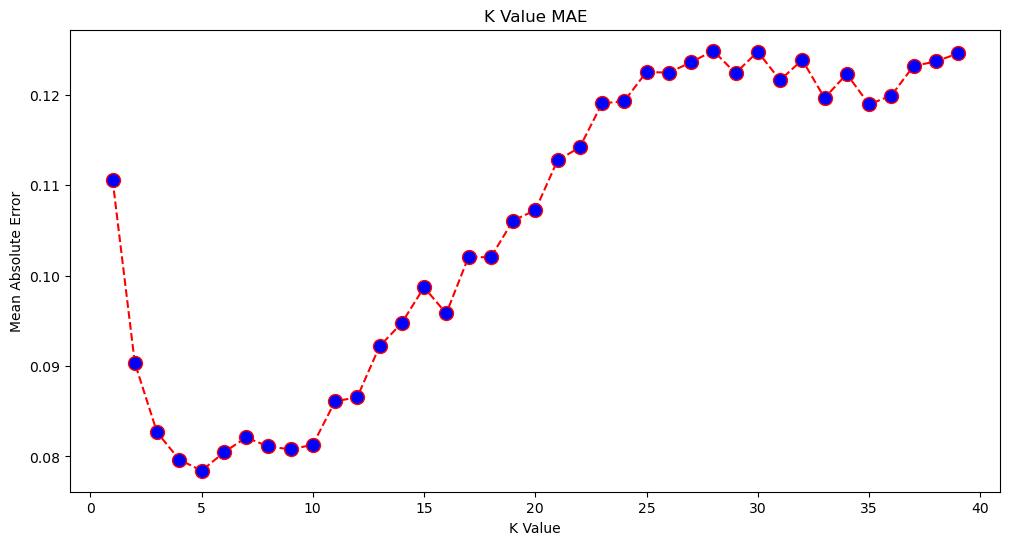

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

In [71]:
print(min(error))               # 0.43631325936692505
print(np.array(error).argmin()) # 11

0.0784267347826085
4


In [74]:
knn_reg12 = KNeighborsRegressor(n_neighbors=5)
knn_reg12.fit(X_train, y_train)
y_pred12 = knn_reg12.predict(X_test)
r2 = knn_reg12.score(X_test, y_test) 

mae12 = mean_absolute_error(y_test, y_pred12)
mse12 = mean_squared_error(y_test, y_pred12)
rmse12 = mean_squared_error(y_test, y_pred12, squared=False)
print(f'r2: {r2}, \nmae: {mae12} \nmse: {mse12} \nrmse: {rmse12}')

r2: 0.9823441257270022, 
mae: 0.0784267347826085 
mse: 0.009570448400073827 
rmse: 0.0978286686001288
